In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [2]:
df=pd.read_csv("S:\data\Sales\healthcare_dataset.csv")

In [3]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


In [8]:
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [10]:
df.describe()

,Age,Billing Amount,Room Number
count,10000.000000,10000.000000,10000.000000
mean,51.452200,25516.806778,300.082000
std,19.588974,14067.292709,115.806027
min,18.000000,1000.180837,101.000000
25%,35.000000,13506.523967,199.000000
50%,52.000000,25258.112566,299.000000
75%,68.000000,37733.913727,400.000000
max,85.000000,49995.902283,500.000000


In [11]:
df.groupby('Medical Condition').agg({'Billing Amount':'mean'})

,Billing Amount
Medical Condition,
Arthritis,25187.631255
Asthma,25416.869895
Cancer,25539.096133
Diabetes,26060.116129
Hypertension,25198.033973
Obesity,25720.842683


In [12]:
df['Date of Admission']=pd.to_datetime(df['Date of Admission'])

In [13]:
df['Discharge Date']=pd.to_datetime(df['Discharge Date'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                10000 non-null  object        
 1   Age                 10000 non-null  int64         
 2   Gender              10000 non-null  object        
 3   Blood Type          10000 non-null  object        
 4   Medical Condition   10000 non-null  object        
 5   Date of Admission   10000 non-null  datetime64[ns]
 6   Doctor              10000 non-null  object        
 7   Hospital            10000 non-null  object        
 8   Insurance Provider  10000 non-null  object        
 9   Billing Amount      10000 non-null  float64       
 10  Room Number         10000 non-null  int64         
 11  Admission Type      10000 non-null  object        
 12  Discharge Date      10000 non-null  datetime64[ns]
 13  Medication          10000 non-null  object     

In [15]:
df.duplicated().sum()

0

In [16]:
df.query('Name=="Chad Byrd"')

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal


In [17]:
df.loc[df.duplicated(subset=['Name','Age','Blood Type'])]

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
6426,Laura Jones,77,Male,O+,Obesity,2020-03-24,Shelby Merritt,Todd-Gonzalez,UnitedHealthcare,25848.394795,428,Elective,2020-04-17,Paracetamol,Abnormal


In [18]:
df.query('Name=="Laura Jones"')

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
990,Laura Jones,77,Female,O+,Hypertension,2021-01-09,Ashley Jackson,"Campbell, Carter and Butler",Blue Cross,36183.545476,343,Urgent,2021-01-24,Ibuprofen,Inconclusive
6426,Laura Jones,77,Male,O+,Obesity,2020-03-24,Shelby Merritt,Todd-Gonzalez,UnitedHealthcare,25848.394795,428,Elective,2020-04-17,Paracetamol,Abnormal


In [19]:
df['Days at Hospital']=(df['Discharge Date']-df['Date of Admission']).dt.days
df['Days at Hospital']

0       14
1       14
2       30
3        1
4       24
        ..
9995     4
9996    23
9997    14
9998    20
9999    24
Name: Days at Hospital, Length: 10000, dtype: int64

In [20]:
df['Days at Hospital']=df['Days at Hospital'].astype(int)

In [21]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Days at Hospital
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive,14
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal,14
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal,30
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal,1
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal,24


<AxesSubplot:title={'center':'Age Classification'}, ylabel='Frequency'>

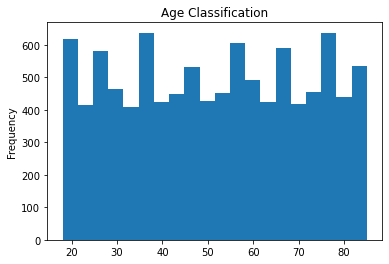

In [22]:
df['Age'].plot(kind='hist',bins=20,title='Age Classification')


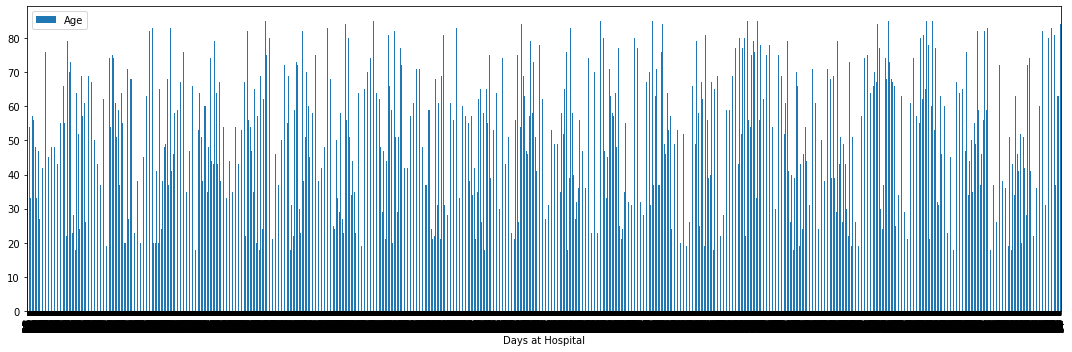

In [23]:
df.plot(kind='bar', x='Days at Hospital', y='Age',figsize=(15,5))
plt.tight_layout()
plt.show()

In [20]:
df['Days at Hospital'].max()

30

Text(0.5, 0, 'Age')

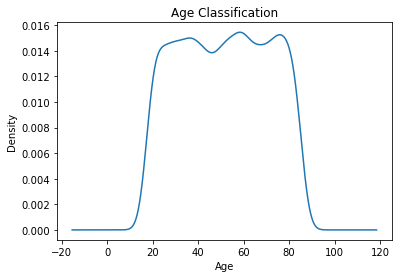

In [21]:
ax=df['Age'].plot(kind='kde',title='Age Classification')
ax.set_xlabel('Age')

<AxesSubplot:>

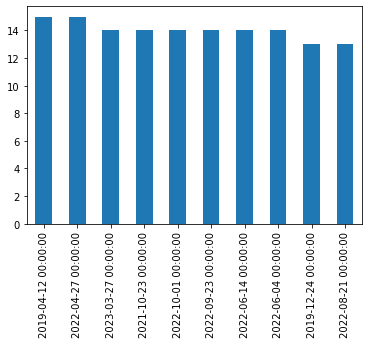

In [22]:
df['Date of Admission'].value_counts().head(10).plot(kind='bar')

In [24]:
df.groupby(['Gender','Age']).agg({'Days at Hospital':'count'})

Days at Hospital
Gender Age                  
Female 18                 86
       19                 62
       20                 94
       21                 80
       22                 59
...                      ...
Male   81                 80
       82                 76
       83                 53
       84                 74
       85                 51

[136 rows x 1 columns]

In [25]:
ax=df.groupby('Gender').aggregate({'Days at Hospital':'count'})
ax

,Days at Hospital
Gender,
Female,5075
Male,4925


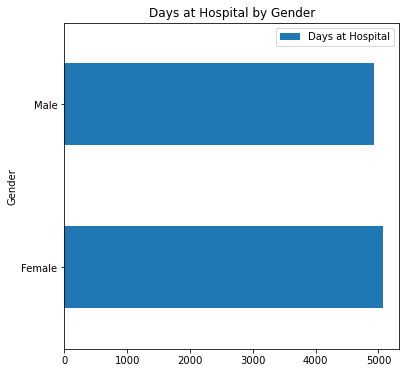

In [26]:
ax.plot(kind='barh', y='Days at Hospital', title='Days at Hospital by Gender',legend=True, figsize=(6,6))

plt.show()


In [27]:
corr=df.corr()

In [28]:
corr

,Age,Billing Amount,Room Number,Days at Hospital
Age,1.000000,-0.009483,-0.005371,0.009111
Billing Amount,-0.009483,1.000000,-0.006160,-0.013507
Room Number,-0.005371,-0.006160,1.000000,0.009610
Days at Hospital,0.009111,-0.013507,0.009610,1.000000


<AxesSubplot:>

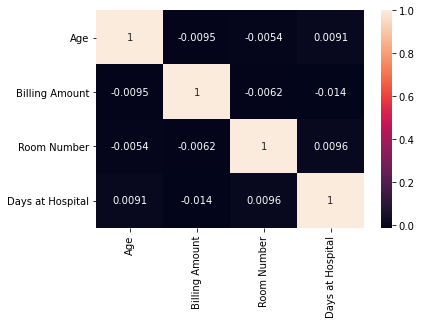

In [29]:
sns.heatmap(corr, annot=True)

In [79]:
df['Billing Amount'] .max()

49995.90228322116

In [77]:
df['Age'].max()

85

In [36]:
df.loc[df['Age'].max()]


Name                         Amanda Ortiz
Age                                    35
Gender                               Male
Blood Type                             A+
Medical Condition                  Cancer
Date of Admission     2019-06-30 00:00:00
Doctor                     John Chavez MD
Hospital                       Miller Ltd
Insurance Provider                  Aetna
Billing Amount               47452.441876
Room Number                           141
Admission Type                     Urgent
Discharge Date        2019-07-20 00:00:00
Medication                        Lipitor
Test Results                     Abnormal
Days at Hospital                       20
Name: 85, dtype: object

In [39]:
df.query('Age==85')

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Days at Hospital
12,Christina Williams,85,Female,A+,Diabetes,2021-11-29,Laura Roberts,"Malone, Thompson and Mejia",Aetna,4835.945650,444,Elective,2021-12-14,Aspirin,Inconclusive,15
103,Amber Solomon,85,Male,A+,Hypertension,2020-12-28,Denise Richards,Lopez-Mason,UnitedHealthcare,23517.461852,389,Urgent,2021-01-14,Paracetamol,Normal,17
139,Sheila Castro,85,Female,AB-,Diabetes,2023-08-19,Zachary Potter,Ross-Kelly,Medicare,10591.269644,115,Emergency,2023-08-27,Penicillin,Inconclusive,8
168,Raymond Cain,85,Female,B+,Asthma,2023-05-24,Joseph Navarro,"Singleton, Cross and Jordan",UnitedHealthcare,21470.417738,264,Elective,2023-05-27,Aspirin,Inconclusive,3
543,Julie Johnston,85,Female,O-,Obesity,2019-10-22,Randy Carlson,"Whitaker, Silva and Thomas",UnitedHealthcare,26730.533031,475,Elective,2019-11-14,Lipitor,Normal,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9846,Kimberly Rivas,85,Female,B-,Diabetes,2019-06-20,Benjamin Fitzgerald,Porter-Johnson,UnitedHealthcare,38745.175874,275,Emergency,2019-06-22,Lipitor,Abnormal,2
9877,Michael Martinez,85,Male,A+,Cancer,2020-05-11,Monica Clark,Martinez LLC,Blue Cross,4780.693192,382,Elective,2020-05-25,Penicillin,Normal,14
9905,Paul Henry,85,Female,B+,Diabetes,2018-12-04,Christine Miles,"Williams, Allen and Walker",Blue Cross,28095.844317,251,Urgent,2018-12-18,Paracetamol,Inconclusive,14
9910,Heather Stewart,85,Female,B+,Arthritis,2018-11-10,Blake Lara,White LLC,UnitedHealthcare,36241.466526,495,Urgent,2018-11-22,Lipitor,Normal,12


In [42]:
from scipy.stats import ttest_1samp

import numpy as np

In [43]:
df['Age'].mean()

51.4522

In [45]:
ttest,p_value=ttest_1samp(df['Age'],51.4522)
ttest, p_value

(0.0, 1.0)

In [40]:
df_sub.nunique()

Gender                   2
Blood Type               8
Medical Condition        6
Doctor                9416
Hospital              8639
Insurance Provider       5
Admission Type           3
Test Results             3
dtype: int64

1.0

In [51]:
size=1000
age_sample=np.random.choice(df['Age'],size)

In [56]:
ttest,p_value=ttest_1samp(age_sample,51.4522)

In [57]:
p_value

0.8109403444079711

In [59]:
if p_value<.05:
    print ("Null Hypothesis is rejected")
else:
   print("Null Hypothesis is accepted")
    
p_value=0.8

Null Hypothesis is accepted


In [60]:
df['Billing Amount'].mean()

25516.806777738453

In [66]:
sample=1000
Billing_sample=np.random.choice(df['Billing Amount'],sample)
ttest,p_value=ttest_1samp(Billing_sample,25516)

In [67]:
p_value

0.0300146403884564

In [69]:
if p_value<0.05:
    print ("Hypothesis is rejected")
else:
           print("Hypothesis is accepted")
           
p_value=0.03

Hypothesis is rejected


In [8]:
df.describe()

,Age,Billing Amount,Room Number
count,10000.000000,10000.000000,10000.000000
mean,51.452200,25516.806778,300.082000
std,19.588974,14067.292709,115.806027
min,18.000000,1000.180837,101.000000
25%,35.000000,13506.523967,199.000000
50%,52.000000,25258.112566,299.000000
75%,68.000000,37733.913727,400.000000
max,85.000000,49995.902283,500.000000


In [4]:
Observed=pd.crosstab(df['Gender'],df['Medical Condition'])
Observed

Medical Condition,Arthritis,Asthma,Cancer,Diabetes,Hypertension,Obesity
Gender,,,,,,
Female,815,874,887,825,836,838
Male,835,834,816,798,852,790


In [5]:
Observed.values

array([[815, 874, 887, 825, 836, 838],
       [835, 834, 816, 798, 852, 790]], dtype=int64)

In [6]:
from scipy.stats import chi2
val=stats.chi2_contingency(Observed.values)

In [7]:
val

(3.906202141706238,
 0.562998167918918,
 5,
 array([[837.375 , 866.81  , 864.2725, 823.6725, 856.66  , 826.21  ],
        [812.625 , 841.19  , 838.7275, 799.3275, 831.34  , 801.79  ]]))

In [20]:
observes_hm=pd.crosstab(df['Medical Condition'],df['Test Results'])
observes_hm

Test Results,Abnormal,Inconclusive,Normal
Medical Condition,,,
Arthritis,555,553,542
Asthma,623,551,534
Cancer,577,556,570
Diabetes,537,542,544
Hypertension,602,554,532
Obesity,562,521,545


In [21]:
from scipy.stats import chi2
val1=stats.chi2_contingency(observes_hm)

In [22]:
val1

(7.723822392194834,
 0.6557931084771458,
 10,
 array([[570.24  , 540.705 , 539.055 ],
        [590.2848, 559.7116, 558.0036],
        [588.5568, 558.0731, 556.3701],
        [560.9088, 531.8571, 530.2341],
        [583.3728, 553.1576, 551.4696],
        [562.6368, 533.4956, 531.8676]]))

In [24]:
critical_val=chi2.ppf(q=1-.05,df=10)

In [25]:
critical_val

18.307038053275146

As the critical_val is greater than chisq statistical value, there is no relationship between the two parameters we reject the null hypothesis